<a href="https://colab.research.google.com/github/LeidyDaniela/AnalisisNumerico2020_2/blob/master/Trabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso Base**

---



In [1]:
pip install pysd 

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 194kB 19.7MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.8.1-cp36-none-any.whl size=42709 sha256=08a654e895c8ae540d3a91f2e79da67fbd4ebc5bf50a35dd4c0a14f60ebbed36
  Stored in directory: /root/.cache/pip/wheels/b7/8d/e7/a0e74217da5caeb3c1c7689639b6d28ddbf9985b840bc96a9a
  Created wheel for pydoe: filename=pyDOE-0.3.8-cp36-none-any.whl size=18178 sha256=15c71cff60f330d3f6ab7a0d30a407bc0cf99db12bdd6dd6a299921b561aae7e
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built parsimonious pydoe


In [2]:
import pysd
from google.colab import files
files.upload()

Saving CasoBase.mdl to CasoBase.mdl


{'CasoBase.mdl': b'{UTF-8}\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t0\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nCOPEX=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futu

In [3]:
model= pysd.read_vensim('CasoBase.mdl')

In [5]:
xy = model.run()

In [6]:
print(xy)

          TIME  Aplicacion TR  ...  SAVEPER  TIME STEP
2017.0  2017.0         2017.0  ...        1          1
2018.0  2018.0         2018.0  ...        1          1
2019.0  2019.0         2019.0  ...        1          1
2020.0  2020.0         2020.0  ...        1          1
2021.0  2021.0         2021.0  ...        1          1
2022.0  2022.0         2022.0  ...        1          1
2023.0  2023.0         2023.0  ...        1          1
2024.0  2024.0         2024.0  ...        1          1
2025.0  2025.0         2025.0  ...        1          1
2026.0  2026.0         2026.0  ...        1          1
2027.0  2027.0         2027.0  ...        1          1
2028.0  2028.0         2028.0  ...        1          1
2029.0  2029.0         2029.0  ...        1          1
2030.0  2030.0         2030.0  ...        1          1
2031.0  2031.0         2031.0  ...        1          1

[15 rows x 42 columns]


In [7]:
xy.head()

,TIME,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,COPEX,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,2017.0,15,222,0,0.22,1.786031e+07,1.604814e+07,0.0,67.530000,4.670880e+08,20.5,0.673,0.035,586340.858880,20.5,0,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,8.712346e+05,7008.0,0.0,1.786031e+07,0.09619,0.204509,0.00062,1415.000000,0.252905,10.801895,30,2031,2017,1,1
2018.0,2018.0,2018.0,15,222,0,0.22,1.872934e+07,1.690608e+07,0.0,69.893550,4.920588e+08,20.5,0.673,0.035,614870.553703,20.5,0,67.53,0.22,232.801895,5.748988e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,9.136264e+05,7008.0,0.0,1.872934e+07,0.09619,0.204509,0.00062,1404.198105,0.251752,11.151577,30,2031,2017,1,1
2019.0,2019.0,2019.0,15,222,0,0.22,1.962651e+07,1.779583e+07,0.0,72.339824,5.179551e+08,20.5,0.673,0.035,644323.821302,20.5,0,67.53,0.22,243.953472,6.051548e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,9.573905e+05,7008.0,0.0,1.962651e+07,0.09619,0.204509,0.00062,1393.046528,0.250622,11.503602,30,2031,2017,1,1
2020.0,2020.0,2020.0,15,222,0,0.22,2.055199e+07,1.871776e+07,0.0,74.871718,5.447885e+08,20.5,0.673,0.035,674706.848888,20.5,0,67.53,0.22,255.457074,6.365057e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.002536e+06,7008.0,0.0,2.055199e+07,0.09619,0.204509,0.00062,1381.542926,0.249513,11.857340,30,2031,2017,1,1
2021.0,2021.0,2021.0,15,222,0,0.22,2.150594e+07,1.967224e+07,0.0,77.492228,5.725689e+08,20.5,0.673,0.035,706024.159532,20.5,0,67.53,0.22,267.314415,6.689630e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.049070e+06,7008.0,0.0,2.150594e+07,0.09619,0.204509,0.00062,1369.685585,0.248427,12.212122,30,2031,2017,1,1


In [9]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0    222.000000
2018.0    232.801895
2019.0    243.953472
2020.0    255.457074
2021.0    267.314415
2022.0    279.526536
2023.0    292.093779
2024.0    305.015740
2025.0    318.291244
2026.0    331.918307
2027.0    345.894112
2028.0    360.214984
2029.0    374.876363
2030.0    389.872788
2031.0    405.197885
Name: capacidad instalada acumulada hidráulica, dtype: float64


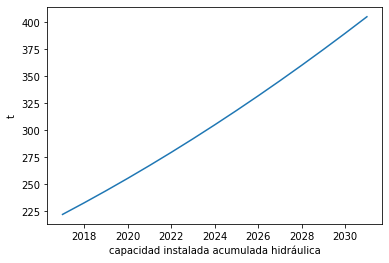

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('capacidad instalada acumulada hidráulica')
ax.set_ylabel('t')
plt.show()

**Escenario 1 **
---

Incentivo: FIT

In [12]:
import pysd
from google.colab import files
files.upload()

Saving E1.mdl to E1.mdl


{'E1.mdl': b'{UTF-8}\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t0\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nCOPEX=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FIT

In [13]:
model= pysd.read_vensim('E1.mdl')

In [14]:
xy = model.run()

In [15]:
xy.head()

,TIME,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,COPEX,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,2017.0,15,222,0,0.22,5.883447e+07,1.604814e+07,0.0,67.530000,4.670880e+08,20.5,0.673,0.035,5.863409e+05,67.53,1,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,8.712346e+05,7008.0,0.0,5.883447e+07,0.09619,0.204509,0.00062,1415.000000,0.833107,33.571325,30,2031,2017,1,1
2018.0,2018.0,2018.0,15,222,0,0.22,7.010215e+07,1.872694e+07,0.0,69.893550,5.450556e+08,20.5,0.673,0.035,6.750086e+05,69.89354999999999,1,67.53,0.22,255.571325,6.368178e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.002985e+06,7008.0,0.0,7.010215e+07,0.09619,0.204509,0.00062,1381.428675,0.850664,38.376053,30,2031,2017,1,1
2019.0,2019.0,2019.0,15,222,0,0.22,8.345054e+07,2.183074e+07,0.0,72.339824,6.353932e+08,20.5,0.673,0.035,7.763665e+05,72.33982424999999,1,67.53,0.22,293.947378,7.423640e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.153591e+06,7008.0,0.0,8.345054e+07,0.09619,0.204509,0.00062,1343.052622,0.868669,43.675371,30,2031,2017,1,1
2020.0,2020.0,2020.0,15,222,0,0.22,9.920456e+07,2.541076e+07,0.0,74.871718,7.395911e+08,20.5,0.673,0.035,8.917208e+05,74.87171809874998,1,67.53,0.22,337.622749,8.641041e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.324994e+06,7008.0,0.0,9.920456e+07,0.09619,0.204509,0.00062,1299.377251,0.887172,49.427844,30,2031,2017,1,1
2021.0,2021.0,2021.0,15,222,0,0.22,1.177085e+08,2.951626e+07,0.0,77.492228,8.590833e+08,20.5,0.673,0.035,1.022268e+06,77.49222823220623,1,67.53,0.22,387.050593,1.003713e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.518972e+06,7008.0,0.0,1.177085e+08,0.09619,0.204509,0.00062,1249.949407,0.906234,55.547319,30,2031,2017,1,1


In [16]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0     222.000000
2018.0     255.571325
2019.0     293.947378
2020.0     337.622749
2021.0     387.050593
2022.0     442.597912
2023.0     504.488884
2024.0     572.738154
2025.0     647.079323
2026.0     726.898170
2027.0     810.945574
2028.0     897.572853
2029.0     984.987228
2030.0    1071.194478
2031.0    1154.162215
Name: capacidad instalada acumulada hidráulica, dtype: float64


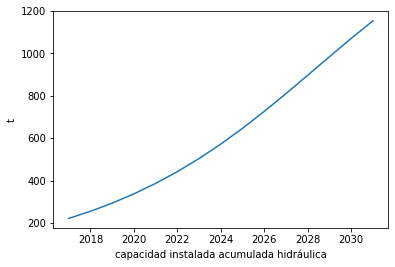

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('capacidad instalada acumulada hidráulica')
ax.set_ylabel('t')
plt.show()

**Escenario 2 **
---

Incentivo: Incentivo por reducción de emisiones de GEI

In [18]:
import pysd
from google.colab import files
files.upload()

Saving E2.mdl to E2.mdl


{'E2.mdl': b'{UTF-8}\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nCOPEX=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FI

In [21]:
model= pysd.read_vensim('E2.mdl')

In [22]:
xy = model.run()

In [23]:
xy.head()

,TIME,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,COPEX,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,2017.0,15,222,15,0.22,1.786031e+07,1.604814e+07,1.319267e+08,67.530000,4.670880e+08,20.5,0.673,0.035,5.863409e+05,20.5,0,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,8.712346e+05,7008.0,17416620.398189805,1.497870e+08,0.09619,0.204509,0.00062,1415.000000,1.701406,67.646861,30,2031,2017,1,1
2018.0,2018.0,2018.0,15,222,15,0.22,2.330262e+07,2.148088e+07,1.721268e+08,69.893550,6.252102e+08,20.5,0.673,0.035,7.650081e+05,20.5,0,67.53,0.22,289.646861,7.304668e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.136713e+06,7008.0,22198413.17368824,1.954294e+08,0.09619,0.204509,0.00062,1347.353139,1.674258,82.462461,30,2031,2017,1,1
2019.0,2019.0,2019.0,15,222,15,0.22,2.993688e+07,2.826959e+07,2.211313e+08,72.339824,8.227985e+08,20.5,0.673,0.035,9.828059e+05,20.5,0,67.53,0.22,372.109322,9.613198e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.460336e+06,7008.0,27866658.614113227,2.510682e+08,0.09619,0.204509,0.00062,1264.890678,1.648855,97.738746,30,2031,2017,1,1
2020.0,2020.0,2020.0,15,222,15,0.22,3.780014e+07,3.650474e+07,2.792140e+08,74.871718,1.062486e+09,20.5,0.673,0.035,1.240951e+06,20.5,0,67.53,0.22,469.848068,1.241360e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.843909e+06,7008.0,34402152.130105026,3.170141e+08,0.09619,0.204509,0.00062,1167.151932,1.625356,112.075067,30,2031,2017,1,1
2021.0,2021.0,2021.0,15,222,15,0.22,4.681679e+07,4.615240e+07,3.458162e+08,77.492228,1.343285e+09,20.5,0.673,0.035,1.536961e+06,20.5,0,67.53,0.22,581.923135,1.569433e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,2.283746e+06,7008.0,41698211.56700793,3.926330e+08,0.09619,0.204509,0.00062,1055.076865,1.603933,123.680632,30,2031,2017,1,1


In [24]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0     222.000000
2018.0     289.646861
2019.0     372.109322
2020.0     469.848068
2021.0     581.923135
2022.0     705.603768
2023.0     836.293294
2024.0     967.954595
2025.0    1094.054993
2026.0    1208.783666
2027.0    1308.099291
2028.0    1390.217370
2029.0    1455.437025
2030.0    1505.519136
2031.0    1542.950628
Name: capacidad instalada acumulada hidráulica, dtype: float64


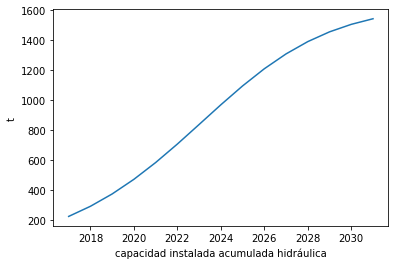

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('capacidad instalada acumulada hidráulica')
ax.set_ylabel('t')
plt.show()

**Escenario 3 **
---
Escenario combinado 

In [26]:
import pysd
from google.colab import files
files.upload()

Saving E3.mdl to E3.mdl


{'E3.mdl': b'{UTF-8}\r\nAplicacion TR=\r\n\tTime\r\n\t~\tyears\r\n\t~\t\t|\r\n\r\n"Aplicaci\xc3\xb3n incentivo (TGC)"=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\ncapacidad inicial instalada=\r\n\t222\r\n\t~\tMW\r\n\t~\t\t|\r\n\r\nIncentivo ambiental=\r\n\t15\r\n\t~\tUSD/TonCO2\r\n\t~\t\t|\r\n\r\nflujo de agregacion de impuestos=\r\n\tIF THEN ELSE(Aplicacion TR>5, Impuesto a la renta, 0)\r\n\t~\t\r\n\t~\t\t|\r\n\r\nComercializacion energ\xc3\xada=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*precio energia H no convencional\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nCOPEX=\r\n\tGeneraci\xc3\xb3n de energ\xc3\xada hidr\xc3\xa1ulica*costo de operaci\xc3\xb3n inicial planta H*((capacidad instalada acumulada hidr\xc3\xa1ulica\\\r\n\t\t/capacidad inicial instalada\r\n)^"lamda - hidro")\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nganancias por certificados CRE=\r\n\tReduccion emisiones GEI*Incentivo ambiental*"Aplicaci\xc3\xb3n incentivo (TGC)"\r\n\t~\tUSD\r\n\t~\t\t|\r\n\r\nPrecio esperado futuro FI

In [27]:
model= pysd.read_vensim('E3.mdl')

In [28]:
xy = model.run()

In [29]:
xy.head()

,TIME,Aplicacion TR,"""Aplicación incentivo (TGC)""",capacidad inicial instalada,Incentivo ambiental,flujo de agregacion de impuestos,Comercializacion energía,COPEX,ganancias por certificados CRE,Precio esperado futuro FIT,"""costo inversion planta h.""",Precio energía hidráulica según escenario,Factor de emisiones,Tasa de inflación,Reduccion emisiones GEI,precio energia H no convencional,Selección FIT,Precio esperado actual FIT,Impuesto a la renta,capacidad instalada acumulada hidráulica,CAPEX,costo de operación inicial planta H,"""costo inversion inicial planta h.""",curva de apendizaje hidraulica,factor de planta,"""Flujo de descuento planta hidráulica (j)""",Flujo de utilizacion energía hidraulica,Generación de energía hidráulica,"""horas generacion H.""",Impuestos generación energía H,ingresos por energía H,"""lamda - hidro""",parametro de imitación,Parametro de innovacion,Potencial disponible hidráulico,"""Rentabilidad proyecto-planta hidráulica""",Tasa de inversion en nueva capacidad h,Tiempo de vida panta hidráulica,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
2017.0,2017.0,2017.0,15,222,15,0.22,5.883447e+07,1.604814e+07,1.319267e+08,67.530000,4.670880e+08,20.5,0.673,0.035,5.863409e+05,67.53,1,67.53,0.22,222.000000,5.457240e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,8.712346e+05,7008.0,26430935.896685805,1.907612e+08,0.09619,0.204509,0.00062,1415.000000,1.965567,78.013564,30,2031,2017,1,1
2018.0,2018.0,2018.0,15,222,15,0.22,8.229247e+07,2.232509e+07,1.782874e+08,69.893550,6.497812e+08,20.5,0.673,0.035,7.923883e+05,69.89354999999999,1,67.53,0.22,300.013564,7.591744e+07,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.177397e+06,7008.0,35714210.42867282,2.605798e+08,0.09619,0.204509,0.00062,1336.986436,1.945254,98.306826,30,2031,2017,1,1
2019.0,2019.0,2019.0,15,222,15,0.22,1.130816e+08,3.045966e+07,2.367076e+08,72.339824,8.865415e+08,20.5,0.673,0.035,1.052034e+06,72.33982424999999,1,67.53,0.22,398.320391,1.035794e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,1.563200e+06,7008.0,47465041.869824514,3.497893e+08,0.09619,0.204509,0.00062,1238.679609,1.927170,119.556355,30,2031,2017,1,1
2020.0,2020.0,2020.0,15,222,15,0.22,1.521691e+08,4.061478e+07,3.077557e+08,74.871718,1.182110e+09,20.5,0.673,0.035,1.367803e+06,74.87171809874998,1,67.53,0.22,517.876746,1.381123e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,2.032397e+06,7008.0,61863483.96299555,4.599248e+08,0.09619,0.204509,0.00062,1119.123254,1.911649,139.106320,30,2031,2017,1,1
2021.0,2021.0,2021.0,15,222,15,0.22,1.997995e+08,5.271703e+07,3.904216e+08,77.492228,1.534352e+09,20.5,0.673,0.035,1.735207e+06,77.49222823220623,1,67.53,0.22,656.983066,1.792666e+08,18.42,2104000.0,0.0645,0.56,0.112,0.8,2.578317e+06,7008.0,78812258.67249015,5.902212e+08,0.09619,0.204509,0.00062,980.016934,1.899064,153.360771,30,2031,2017,1,1


In [30]:
print(xy['capacidad instalada acumulada hidráulica'])

2017.0     222.000000
2018.0     300.013564
2019.0     398.320391
2020.0     517.876746
2021.0     656.983066
2022.0     810.343836
2023.0     969.006141
2024.0    1121.777984
2025.0    1257.996886
2026.0    1370.443341
2027.0    1456.815518
2028.0    1519.136443
2029.0    1561.875518
2030.0    1590.061143
2031.0    1608.116215
Name: capacidad instalada acumulada hidráulica, dtype: float64


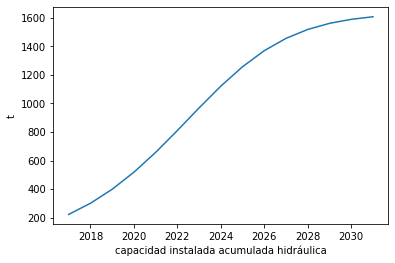

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().gca() 
ax.plot(xy['TIME'], xy['capacidad instalada acumulada hidráulica'])
ax.set_xlabel('capacidad instalada acumulada hidráulica')
ax.set_ylabel('t')
plt.show()